In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from subprocess import call
from scipy.optimize import curve_fit
import os
import sys
sys.path.append('../')
from package_global_functions import *

extSSDpath = getExternalSSDpath()
if os.path.exists(extSSDpath):
    path = extSSDpath + getProjectFoldername() + '/det_sols_from_polynomial/res_files'
else:
    path = '/res_files'

In [2]:
q2 = 10
q1s = [1,2,3,4,5,6,7,8,9]
l = 0.0
x = 2

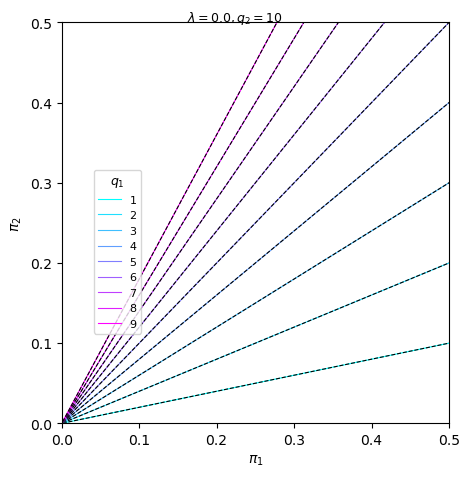

In [3]:
fig, ax = plt.subplots(figsize=(4.8,4.8))
colors = plt.cm.cool(np.linspace(0,1,len(q1s)))
ax.set(xlabel=r'$\pi_1$', ylabel=r'$\pi_2$', xlim=(0.0, 0.5), ylim=(0.0, 0.5))
for i,q1 in enumerate(q1s):
    #call(f'python find_Tlines_asym.py {q1} {q2} {l} {x}', shell=True)
    tline = pd.read_csv(f'{path}/Tline_asym_pis_q1_{q1}_q2_{q2}_l_{l}_f2_{int(x)}f1.csv')
    ax.plot(tline['pi1'], tline['pi2'], lw=0.8, color=colors[i], label=f'{q1}')
    ax.plot(tline['pi1'], 2*tline['pi1']*q1/q2, lw=0.8, color='k', ls='--')
fig.legend(title=r'$q_1$', fontsize=8, title_fontsize=9, loc=(0.2, 0.3))
#ax.set_aspect(1.0)
fig.text(0.4, 0.96, rf'$\lambda = {l}, q_2 = {q2}$', fontsize=9)
fig.tight_layout()

In [4]:
def pi2_trial(pi1, m3, n):
    delta = (q2-q1)/(q2+q1)
    return 2*q1/q2*pi1+l*q1/q2*(pi1+m3)**4+l*n

[-0.8747065  -0.63794565] [0.00581881 0.00052415]
[-0.63268665 -0.46295428] [0.00488327 0.00050745]
[-0.47098161 -0.27859727] [0.00462996 0.00033137]
[-0.31644895 -0.09313191] [0.00419251 0.00017061]


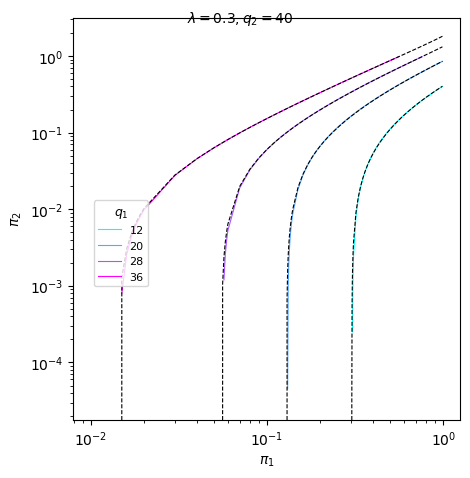

In [24]:
#q2 = 10
#q1s = [2,3,4,5,6,7,8,9]
q2 = 40
q1s = [12,20,28,36]
l = 0.3
x = 2

fig, ax = plt.subplots(figsize=(4.8,4.8))
colors = plt.cm.cool(np.linspace(0,1,len(q1s)))
ax.set(xlabel=r'$\pi_1$', ylabel=r'$\pi_2$', xscale='log', yscale='log') # , xlim=(0.0, 0.5), ylim=(-0.1, 0.5)
for i,q1 in enumerate(q1s):
    #call(f'python find_Tlines_asym.py {q1} {q2} {l} {x}', shell=True)
    tline = pd.read_csv(f'{path}/Tline_asym_pis_q1_{q1}_q2_{q2}_l_{l}_f2_{int(x)}f1.csv')
    ax.plot(tline['pi1'], tline['pi2'], lw=0.8, color=colors[i], label=f'{q1}')
    tline_filtered = tline.query('pi2 == pi2')
    #ax.plot(tline['pi1'], 2*tline['pi1']*q1/q2, lw=0.8, color='k', ls='--')
    params, pcov = curve_fit(pi2_trial, tline_filtered['pi1'], tline_filtered['pi2'])
    perr = np.sqrt(np.diag(pcov))
    ax.plot(tline['pi1'], pi2_trial(tline['pi1'], *params), lw=0.8, color='k', ls='--')
    print(params, perr)
fig.legend(title=r'$q_1$', fontsize=8, title_fontsize=9, loc=(0.2, 0.4))
#ax.set_aspect(1.0)
fig.text(0.4, 0.96, rf'$\lambda = {l}, q_2 = {q2}$')
fig.tight_layout()

[-0.97774137 -0.73520447]
[-0.82018784 -0.59616343]
[-0.68118377 -0.45025597]
[-0.53585279 -0.30007086]
[-0.40220792 -0.15010423]


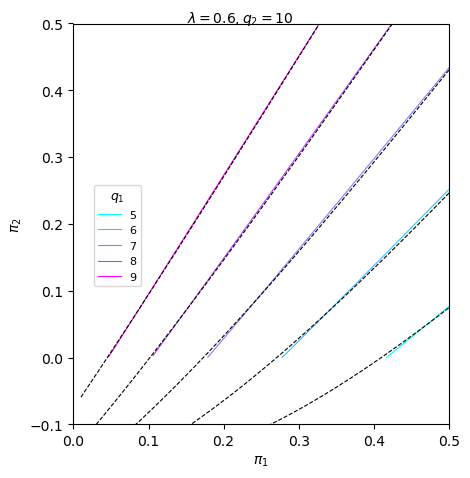

In [6]:
q2 = 10
q1s = [5,6,7,8,9]
l = 0.6
x = 2

fig, ax = plt.subplots(figsize=(4.8,4.8))
colors = plt.cm.cool(np.linspace(0,1,len(q1s)))
ax.set(xlabel=r'$\pi_1$', ylabel=r'$\pi_2$', xlim=(0.0, 0.5), ylim=(-0.1, 0.5))
for i,q1 in enumerate(q1s):
    #call(f'python find_Tlines_asym.py {q1} {q2} {l} {x}', shell=True)
    tline = pd.read_csv(f'{path}/Tline_asym_pis_q1_{q1}_q2_{q2}_l_{l}_f2_{int(x)}f1.csv')
    ax.plot(tline['pi1'], tline['pi2'], lw=0.8, color=colors[i], label=f'{q1}')
    tline_filtered = tline.query('pi2 == pi2')
    #ax.plot(tline['pi1'], 2*tline['pi1']*q1/q2, lw=0.8, color='k', ls='--')
    params, _ = curve_fit(pi2_trial, tline_filtered['pi1'], tline_filtered['pi2'])
    ax.plot(tline['pi1'], pi2_trial(tline['pi1'], *params), lw=0.8, color='k', ls='--')
    print(params)
fig.legend(title=r'$q_1$', fontsize=8, title_fontsize=9, loc=(0.2, 0.4))
#ax.set_aspect(1.0)
fig.text(0.4, 0.96, rf'$\lambda = {l}, q_2 = {q2}$')
fig.tight_layout()

In [27]:
def pi2_0_trial(pi1, m1, m2, n):
    delta = (q2-q1)/(q2+q1)
    #return l*q1/q2*(pi1+m3)**4+l*n
    return l*m1*(pi1+m2)**4 + l*n

[ 0.00940251 -1.68354124 -0.64558346] [0.00045502 0.01797636 0.00020226]
[ 0.01627969 -1.27481566 -0.46536852] [0.00108783 0.01946058 0.0001564 ]
[ 0.02731551 -0.94269717 -0.27974718] [0.0023563  0.01900605 0.00010983]
[ 0.02781815 -0.68671546 -0.09323242] [2.64618066e-03 1.60732109e-02 4.17535811e-05]


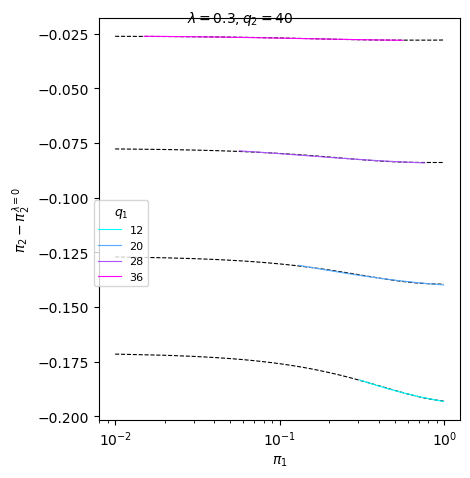

In [32]:
#q2 = 10
#q1s = [2,3,4,5,6,7,8,9]
q2 = 40
q1s = [12,20,28,36]
l = 0.3
x = 2

fig, ax = plt.subplots(figsize=(4.8,4.8))
colors = plt.cm.cool(np.linspace(0,1,len(q1s)))
ax.set(xlabel=r'$\pi_1$', ylabel=r'$\pi_2 - \pi_2^{\lambda = 0}$', xscale='log') # , xlim=(0.0, 0.5), ylim=(-0.1, 0.5)
for i,q1 in enumerate(q1s):
    #call(f'python find_Tlines_asym.py {q1} {q2} {l} {x}', shell=True)
    tline = pd.read_csv(f'{path}/Tline_asym_pis_q1_{q1}_q2_{q2}_l_{l}_f2_{int(x)}f1.csv')
    tline0 = pd.read_csv(f'{path}/Tline_asym_pis_q1_{q1}_q2_{q2}_l_0.0_f2_{int(x)}f1.csv')
    #tline['pi2_0'] = tline['pi2'] - tline0['pi2']
    tline['pi2_0'] = tline['pi2'] - 2*tline['pi1']*q1/q2
    #ax.plot(tline['pi1'], tline['pi2_0'], lw=0.8, color=colors[i], label=f'{q1}')
    delta = (q2-q1)/(q2+q1)
    #ax.axhline(, ls='--', color='k', lw=0.8)
    # fit:
    tline_filtered = tline.query('pi2_0 == pi2_0')
    params, pcov = curve_fit(pi2_0_trial, tline_filtered['pi1'], tline_filtered['pi2_0'])
    perr = np.sqrt(np.diag(pcov))
    print(params, perr)
    ax.plot(tline['pi1'], pi2_0_trial(tline['pi1'], *params), lw=0.8, color='k', ls='--')
    ax.plot(tline['pi1'], tline['pi2_0'], lw=0.8, color=colors[i], label=f'{q1}')
fig.legend(title=r'$q_1$', fontsize=8, title_fontsize=9, loc=(0.2, 0.4))
#ax.set_aspect(1.0)
fig.text(0.4, 0.96, rf'$\lambda = {l}, q_2 = {q2}$')
fig.tight_layout()

In [46]:
i = tline[tline.pi1 == 0.5].index[0]
#print(i)
tline.iloc[i-1].pi1

0.49

In [32]:
def lambda_trial(pi2, m3):
    return (pi2-2*q1/q2*pi1)*m3*l*pi2**2

[-7003.32254567]
[-3230.67360291]
[-2294.54725158]
[-2454.95805143]


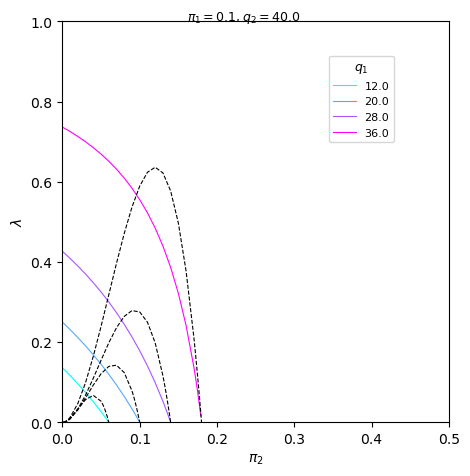

In [33]:
q2 = 40.0
q1s = [12.0,20.0,28.0,36.0]
pi1 = 0.1

fig, ax = plt.subplots(figsize=(4.8,4.8))
colors = plt.cm.cool(np.linspace(0,1,len(q1s)))
ax.set(xlabel=r'$\pi_2$', ylabel=r'$\lambda$', xlim=(0.0,0.5), ylim=(0.0,1.0))
for i,q1 in enumerate(q1s):
    if not os.path.exists(f'{path}/Tline_asym_fixPi1_pi1_{pi1}_q1_{q1}_q2_{q2}_f2_{int(x)}f1.csv'):
        call(f'python find_Tlines_asym_fixPi1.py {q1} {q2} {pi1} {x}', shell=True)
    tline = pd.read_csv(f'{path}/Tline_asym_fixPi1_pi1_{pi1}_q1_{q1}_q2_{q2}_f2_{int(x)}f1.csv')
    #tline_aux = pd.read_csv(f'{path}/Tline_asym_pis_q1_{int(q1)}_q2_{int(q2)}_l_{l}_f2_{int(x)}f1.csv')
    #tline_aux_filtered = tline_aux.query('pi2 == pi2')
    #params, pcov = curve_fit(pi2_trial, tline_aux_filtered['pi1'], tline_aux_filtered['pi2'])
    tline = tline.rename(columns={'lambda':'lamb'})
    tline_filtered = tline.query('lamb == lamb')
    params, _ = curve_fit(lambda_trial, tline_filtered['pi2'], tline_filtered['lamb'])
    print(params)
    ax.plot(tline['pi2'], tline['lamb'], lw=0.8, color=colors[i], label=f'{q1}')
    ax.plot(tline['pi2'], lambda_trial(tline['pi2'], *params), lw=0.8, color='k', ls='--')
fig.legend(title=r'$q_1$', fontsize=8, title_fontsize=9, loc=(0.7, 0.7))
fig.text(0.4, 0.96, rf'$\pi_1= {pi1}, q_2 = {q2}$', fontsize=9)
fig.tight_layout()